In [ ]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9661,2024-07-16,454.220001,454.299988,446.660004,449.519989,449.519989,17175700
9662,2024-07-17,442.589996,444.850006,439.179993,443.519989,443.519989,21778000
9663,2024-07-18,444.339996,444.649994,434.399994,440.369995,440.369995,20794800
9664,2024-07-19,433.100006,441.140015,432.000000,437.109985,437.109985,20940400


In [ ]:
import datetime

In [ ]:
def str_to_datetime(s):
    split = s.split('-')
    return datetime.datetime(day=int(split[2]), month=int(split[1]), year=int(split[0]))

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9666 entries, 0 to 9665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9666 non-null   datetime64[ns]
 1   Open       9666 non-null   float64       
 2   High       9666 non-null   float64       
 3   Low        9666 non-null   float64       
 4   Close      9666 non-null   float64       
 5   Adj Close  9666 non-null   float64       
 6   Volume     9666 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 528.7 KB


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9661,2024-07-16,454.220001,454.299988,446.660004,449.519989,449.519989,17175700
9662,2024-07-17,442.589996,444.850006,439.179993,443.519989,443.519989,21778000
9663,2024-07-18,444.339996,444.649994,434.399994,440.369995,440.369995,20794800
9664,2024-07-19,433.100006,441.140015,432.000000,437.109985,437.109985,20940400


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df = df[['Date', 'Close']]
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-07-16,449.519989
2024-07-17,443.519989
2024-07-18,440.369995


In [ ]:
import matplotlib.pyplot as plt

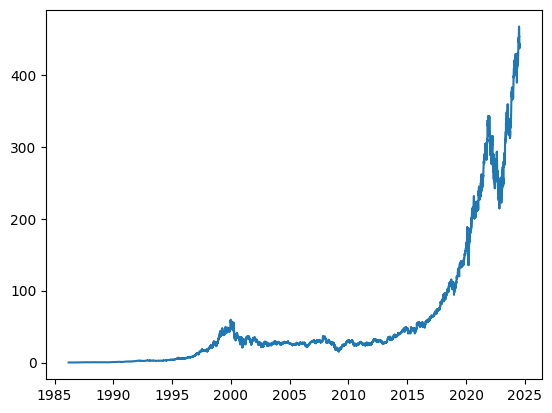

In [ ]:
plt.plot(df.index, df['Close'])
plt.show()

In [ ]:
import numpy as np

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(df,
                                '2023-01-21',
                                '2024-07-22',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-21,240.350006,235.809998,231.929993,240.220001
1,2023-01-24,231.929993,240.220001,242.580002,242.039993
2,2023-01-25,240.220001,242.580002,242.039993,240.610001
3,2023-01-26,242.580002,242.039993,240.610001,248.000000
4,2023-01-27,242.039993,240.610001,248.000000,248.160004
...,...,...,...,...,...
371,2024-07-16,454.700012,453.549988,453.959991,449.519989
372,2024-07-17,453.549988,453.959991,449.519989,443.519989
373,2024-07-18,453.959991,449.519989,443.519989,440.369995
374,2024-07-19,449.519989,443.519989,440.369995,437.109985


In [ ]:
def windowe_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]
  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowe_df_to_date_X_y(windowed_df)
print(dates.shape)
print(X.shape)
print(y.shape)

(376,)
(376, 3, 1)
(376,)


In [ ]:
q_80 = int(len(dates)  * .8)
q_90 = int(len(dates)  * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

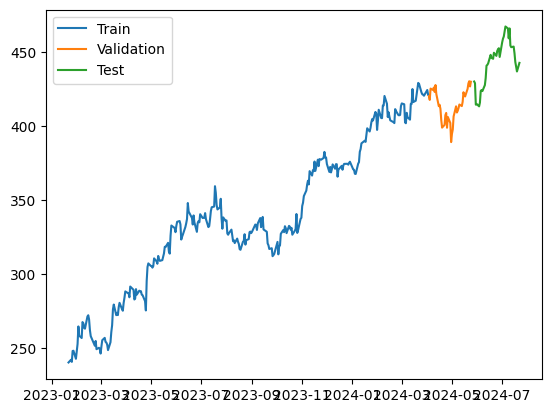

In [ ]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000)

Epoch 1/1000
10/10 [==============================] - 4s 86ms/step - loss: 115442.8281 - mean_absolute_error: 336.2129 - val_loss: 171028.1250 - val_mean_absolute_error: 413.4177
Epoch 2/1000
10/10 [==============================] - 0s 13ms/step - loss: 114915.3828 - mean_absolute_error: 335.4294 - val_loss: 170301.0625 - val_mean_absolute_error: 412.5374
Epoch 3/1000
10/10 [==============================] - 0s 17ms/step - loss: 114206.1172 - mean_absolute_error: 334.3709 - val_loss: 169190.2812 - val_mean_absolute_error: 411.1889
Epoch 4/1000
10/10 [==============================] - 0s 15ms/step - loss: 113132.3750 - mean_absolute_error: 332.7574 - val_loss: 167562.6250 - val_mean_absolute_error: 409.2049
Epoch 5/1000
10/10 [==============================] - 0s 13ms/step - loss: 111535.6328 - mean_absolute_error: 330.3488 - val_loss: 165108.8281 - val_mean_absolute_error: 406.1954
Epoch 6/1000
10/10 [==============================] - 0s 16ms/step - loss: 109014.2969 - mean_absolute_er

10/10 [==============================] - 1s 4ms/step


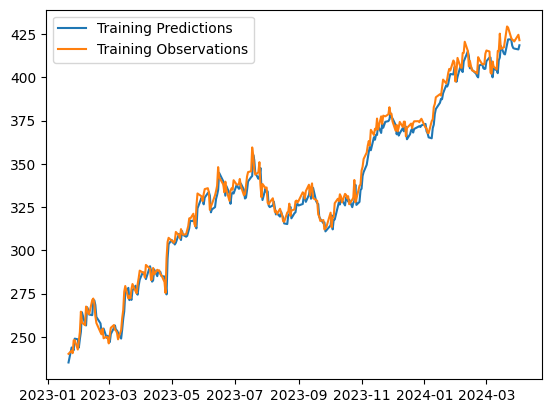

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 6ms/step


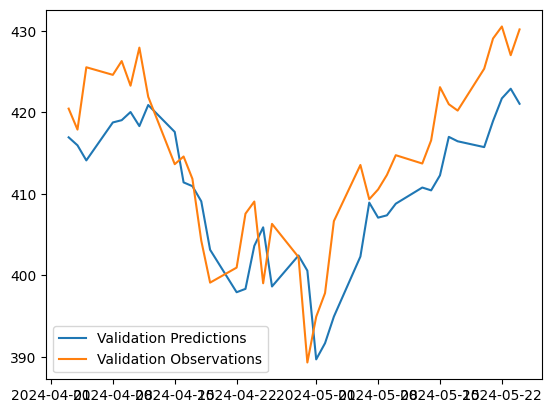

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 6ms/step


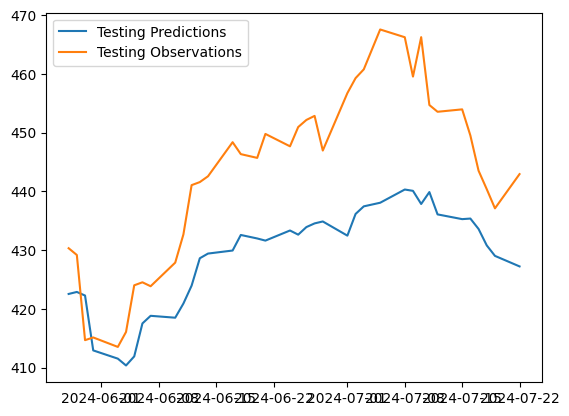

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

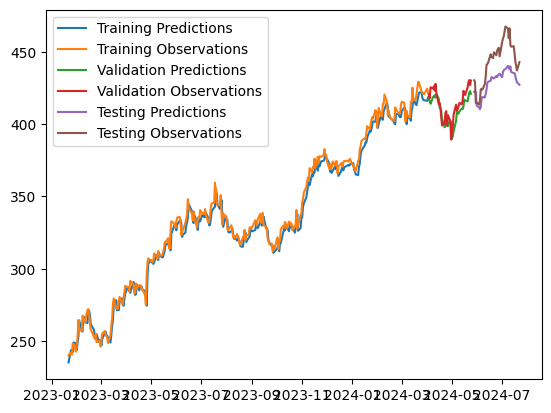

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])